In [246]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [247]:
'''
Encontrar la configuración que adopta un sistema de N=50 partículas que interacutan con un potencial de lennar Jonnes. 
Use el algoritmo genético para minimizar la energía total del sistema: Use la siguiente definición de potencial y de energía: 
(Estos no son métodos de clase , Cuidado!)
'''
def LennardJones(r, epsilon=1, sigma=1):
    """
    Potencial de Lennard-Jones para dos partículas a una distancia r.
    """
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

def TotalEnergy(positions, epsilon=1, sigma=1):
    """
    Calcula la energía total de un sistema de partículas en posiciones dadas.
    """
    N = len(positions)
    energy = 0
    for i in range(N):
        for j in range(i + 1, N):
            r = np.linalg.norm(positions[i] - positions[j])  # Distancia entre partículas
            if r != 0:
                energy += LennardJones(r, epsilon, sigma)
    return energy

In [248]:
class Robot:
    
    def __init__(self,dt,Id=0):
        
        self.Id = Id
        self.dt = dt
        self.fitness = np.inf
        
        self.r = np.random.uniform(-10, 10, size = 2)
        
        theta = np.random.uniform(0.,2*np.pi)

        velo = np.random.uniform(0,10)
        self.v = np.array([velo*np.cos(theta),velo*np.sin(theta)]) 
        
        
    
    def GetR(self):
        return self.r
        
    def Evolution(self):
        self.r += self.v*self.dt + np.random.uniform(0.1,10)
    
    def SetFitness(self, pos):
        h = 1e-5
        hd = np.zeros_like(pos)
        hd[self.Id] = (h,h)
        fd = pos + hd
        bd = pos - hd
        
        derivada = (TotalEnergy(fd)-TotalEnergy(bd))/(2*h)
        self.fitness = derivada

In [249]:
def GetRobots(N):
    
    Robots = []
    
    for i in range(N):
        r = Robot(dt,Id=i)
        Robots.append(r)
        
    return Robots

Robots = GetRobots(50)

-8.51015766558769e-10


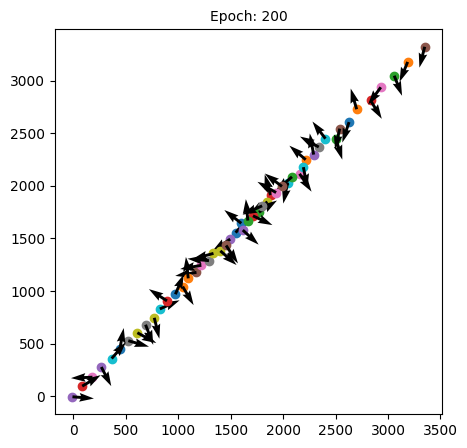

Energia del sistema:  -8.51015766558769e-10


In [252]:
def Plotter(e):

  fig = plt.figure(figsize=(5,5))
  ax = fig.add_subplot(111)
  ax.set_title('Epoch: {:.0f}'.format(e),fontsize=10)

  return fig,ax

def TimeEvolution(Robots, s = 5, dt = 0.01):
  t = np.arange(0.,s,dt)
  
  for it in range(t.shape[0]+1):
    pos = np.zeros((len(Robots), 2))
    
    for i, p in enumerate(Robots):
      pos[i]=p.r   
    
    clear_output(wait=True)
    fig, ax = Plotter(it)
    
    for i,p in enumerate(Robots):
        
        p.SetFitness(pos)       
      
        ax.scatter(p.r[0],p.r[1])
        ax.quiver(p.r[0],p.r[1],p.v[0],p.v[1])
    
    score = [ (p.fitness, p) for p in Robots ]
    score = sorted(score, key=lambda x: x[0], reverse=False)
    
    for i,p in enumerate(Robots):
      if p.fitness > 0:
        p.Evolution()
    
    print(TotalEnergy(pos))
    plt.show()
    
    time.sleep(0.00001)
  print('Energia del sistema: ', TotalEnergy(pos))
  return pos


final_pos = TimeEvolution(Robots, 2)

In [263]:
sorted(final_pos, key = lambda x: np.linalg.norm(x))

[array([-9.12095114, -5.77274335]),
 array([83.90174867, 95.14093946]),
 array([181.64366299, 180.5019092 ]),
 array([265.95573903, 277.07279887]),
 array([364.66066177, 357.7934754 ]),
 array([442.23541701, 446.67597806]),
 array([523.48678317, 527.13489532]),
 array([609.98655014, 603.02952174]),
 array([688.12465434, 679.2456004 ]),
 array([771.13189865, 744.89404331]),
 array([824.3798093 , 829.34006728]),
 array([892.15383121, 906.02825177]),
 array([972.62250882, 969.01687455]),
 array([1042.05985938, 1041.95918939]),
 array([1095.1155441 , 1120.06600386]),
 array([1173.64718836, 1177.09186893]),
 array([1220.03074877, 1244.21682935]),
 array([1292.5865495 , 1288.25535699]),
 array([1335.8207043 , 1357.44560172]),
 array([1401.31663647, 1381.45402855]),
 array([1456.1818582 , 1432.73957057]),
 array([1495.17206452, 1493.00819241]),
 array([1546.52410318, 1554.76018659]),
 array([1615.33189834, 1578.81010558]),
 array([1600.97116016, 1643.35590944]),
 array([1663.36825487, 1669.19